# **기계학습 - 중간고사 대체 과제**

**<div style="text-align: right"> 202021497 이주철 </div>**

## **지도학습을 이용한 회귀 모델 구현 및 분석**

### **과제 목적:**

- A. 실제 데이터를 기반으로 연속형 값을 예측하는 회귀 모델을 구축한다. 
- B. 회귀 모델의 성능을 다양한 지표로 평가하고, 최적의 하이퍼파라미터를 찾아본다.
- C. scikit-learn 라이브러리를 활용한 전처리, 모델링, 튜닝 능력을 통합적으로
평가한다.

### **데이터셋:**

- 냉난방 부하 데이터셋:
    - 데이터셋은 건물 면적, 방향, 창 크기 등 건축 특성이 존재합니다. 
    - 결측치 처리 (삭제 또는 SimpleImputer)
    - 범주형 변수 인코딩 (get_dummies 또는 OneHotEncoder)
    - 스케일링 (StandardScaler)
    - 변수 간 상관관계 확인 및 시각화를 진행합니다.

### **과제:**

- 모델 구현:
    - LinearRegression - 데이터를 직선(선형)으로 모델링하며, 평균 제곱 오차(MSE)를 최소화하는 방식입니다.
    - Ridge - 선형 회귀에 L2 정규화를 적용하여 과적합(overfitting)을 방지하고,
계수(가중치)를 안정적으로 조절해 더 일반화된 예측이 가능하도록 돕습니다.  
- 성능 평가 및 시각화:
    - 훈련된 DecisionTreeRegressor, RandomForestRegressor 모델을 활용하여 이미지가 어떤 장르인지 분류하세요.
    - RMSE, MAE / R^2  Score를 모두 사용하여 평가 지표를 나타낸다. 시각화를 포함하여 예측값과 실제값에 대한 산점도를 보여줍니다. 
- 최적 모델 선정 및 결과 분석:
    - GridSearchCV 또는 RandomizedSearchCV 사용하여 시스템의 정확도와 성능을 분석합니다.
    - 모델의 한계와 고려할 점을 분석합니다.

---

과제를 시작하기 전, 과제에 필요한 모듈을 다운로드합니다.

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **1) 데이터셋 불러오기**
---

- **데이터를 불러옵니다. 아래와 같은 디렉토리 구조로 구성되어있습니다.**
```
├── data
│   └── energy_efficiency_data.csv
├── main.ipynb
```


In [2]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('data/energy_efficiency_data.csv')

# 기본 정보 확인
print(df.describe())
print(df.head())

       Relative_Compactness  Surface_Area   Wall_Area   Roof_Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall_Height  Orientation  Glazing_Area  Glazing_Area_Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

## **2) EDA분석**
---

- 타겟과 가장 상관관계가 있는거는 지붕크기(Roof Area)와 층고(Overall Height)가 관계가 있다고다고 판단됩니다. 방향(Orientation)이나 창문이 어느 방향에 있는지(Glazing Area Distribution)는 이상치로 생각하여 제거합니다.
- 결측치를 먼저 확인합니다. 이때, 결측치는 존재하지 않았고, 0을 가진 창면적 비율 (Glazing Area), 창 위치 (Glazing Area Distribution) 컬럼이 존재합니다. 
하지만 이 컬럼에서 0은 창문이 없는 값이라고 판단하여 실제 의미있는 값이라고 두었었습니다.

  결측치 개수:

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64
  각 컬럼별 0의 개수:

Relative_Compactness          0
Surface_Area                  0
Wall_Area                     0
Roof_Area                     0
Overall_Height                0
Orientation                   0
Glazing_Area                 48
Glazing_Area_Distribution    48
Heating_Load                  0
Cooling_Load                  0
dtype: int64


C:\Users\jclle\AppData\Local\Temp\ipykernel_12040\1774143192.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jclle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


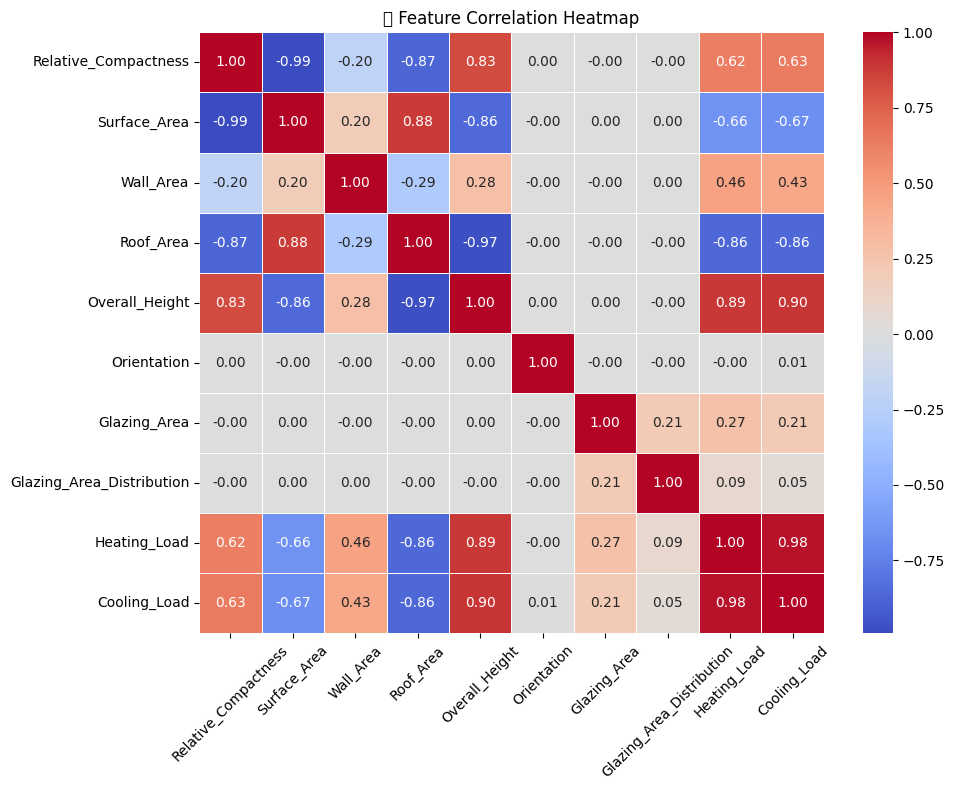

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 결측치 개수 확인
print("  결측치 개수:\n")
print(df.isnull().sum())

# '0'의 개수 확인
zero_counts = (df == 0).sum()
print("  각 컬럼별 0의 개수:\n")
print(zero_counts)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 종속변수 분포 시각화
종속변수 즉, Heating_Load, Cooling_Load 두 컬럼에 대한 분포도를 시각화로 나타내보았습니다. 

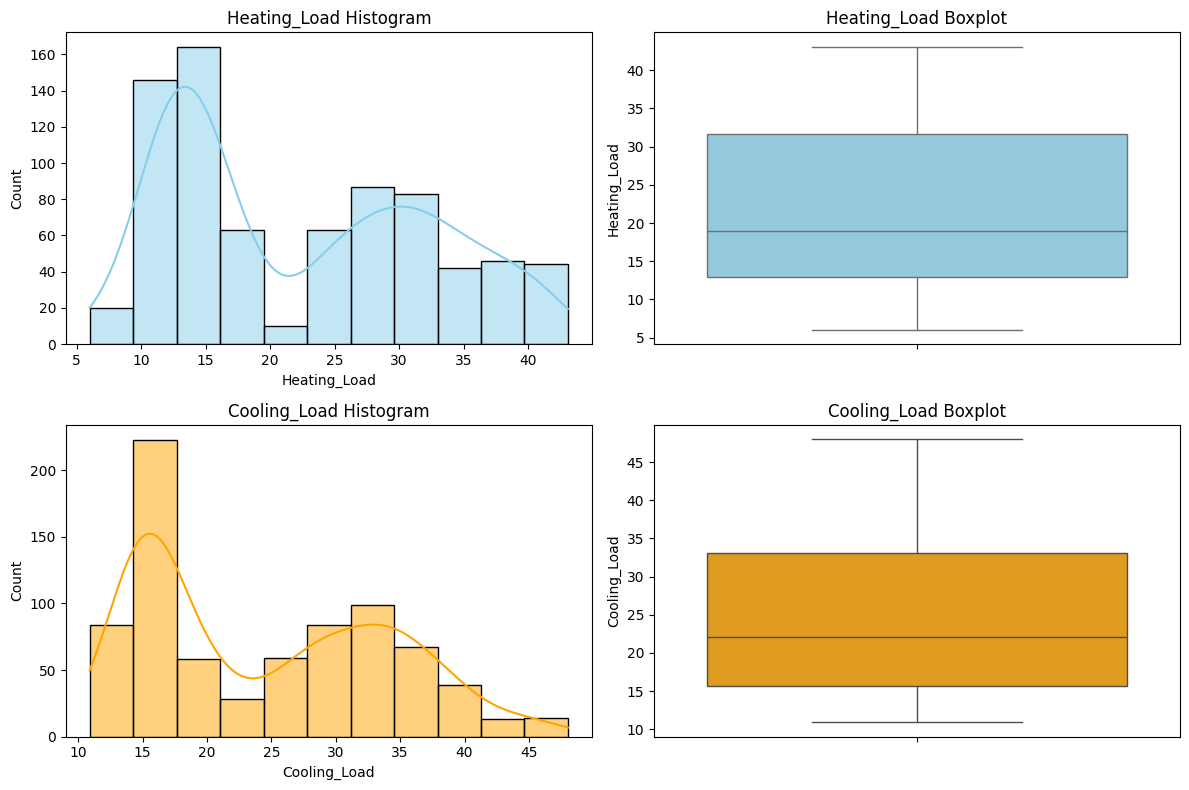

In [4]:

# 히스토그램 & 박스플롯 시각화
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Heating_Load 히스토그램
sns.histplot(df['Heating_Load'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Heating_Load Histogram")

# Heating_Load 박스플롯
sns.boxplot(y=df['Heating_Load'], ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title("Heating_Load Boxplot")

# Cooling_Load 히스토그램
sns.histplot(df['Cooling_Load'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Cooling_Load Histogram")

# Cooling_Load 박스플롯
sns.boxplot(y=df['Cooling_Load'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Cooling_Load Boxplot")

plt.tight_layout()
plt.show()

## **3) 타겟 설정 및 학습 데이터 분리**
---

- x, y에 입력 변수와 예측할 컬럼들을 설정하여 피처로 사용하고 train과 test로 분리하여 학습과 예측을 진행합니다.
- Orientation, Glazing_Area_Distribution 컬럼은 상관관계가 없다고 생각하여 제거하였습니다. 
- 모든 컬럼이 수치형이기에 인코딩할 범주형이 없어 get_dummies, OneHotEncoder로 처리하지 않습니다.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 가독성을 높이기 위해 제거할 피저들을 리스트로 정의합니다.
feature_to_drop= [
    'Heating_Load',
    'Cooling_Load',
    'Orientation',
    'Glazing_Area_Distribution',
    ]

# 타겟 변수: Heating_Load와 Cooling_Load (냉난방 부하를 측정하기 위함)로 설정합니다. 
y = df[['Heating_Load','Cooling_Load']]

# 입력 변수: Heating_Load와 Cooling_Load 타겟과 불필요한 피처를 제외하고 나머지 피처를 사용합니다. 
X = df.drop(columns=feature_to_drop, axis=1)

# 2. 과적합을 방지하기 위해 train/test 분할합니다. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. StandardScaler → 훈련 데이터로만 fit을 사용합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 학습 시킬 x 데이터를 확인합니다. 
print("  X_train shape:", X_train.shape)
print("  X_test shape :", X_test.shape)
print("\n  [Train 데이터 미리보기]")
display(X_train.head())

  X_train shape: (614, 6)
  X_test shape : (154, 6)

  [Train 데이터 미리보기]


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area
60,0.82,612.5,318.5,147.0,7.0,0.10
618,0.64,784.0,343.0,220.5,3.5,0.40
346,0.86,588.0,294.0,147.0,7.0,0.25
294,0.90,563.5,318.5,122.5,7.0,0.25
231,0.66,759.5,318.5,220.5,3.5,0.10


In [6]:
# 범주형 변수 확인합니다. 
categorical_cols = df.select_dtypes(include=['object']).columns
print("범주형 변수:", categorical_cols)

# 수치형 피처를 자동으로 추출합니다. (결과 예측 컬럼 제외)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("수치형 변수:", numerical_features)

범주형 변수: Index([], dtype='object')
수치형 변수: ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area']


## **4) 변수 간 시각화**
---

- 수치형 변수 간의 상관관계를 파악합니다. 전체 수치형 상관관계, 'Heating_Load'와의 상관관계 마지막으로 'Cooling_Load'와의 상관관계를 히드맵과 막대그래프로 표현했습니다.

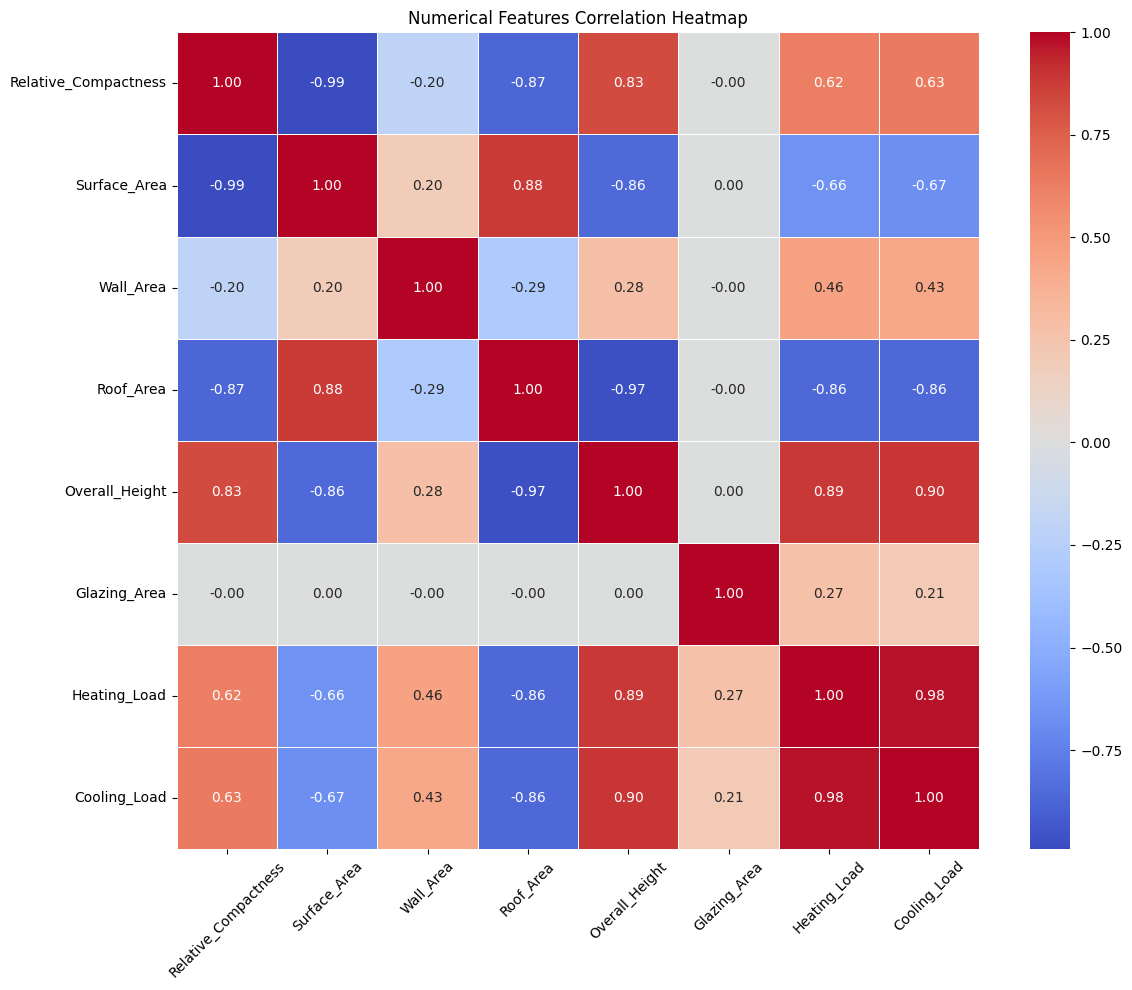

C:\Users\jclle\AppData\Local\Temp\ipykernel_12040\616767646.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\jclle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


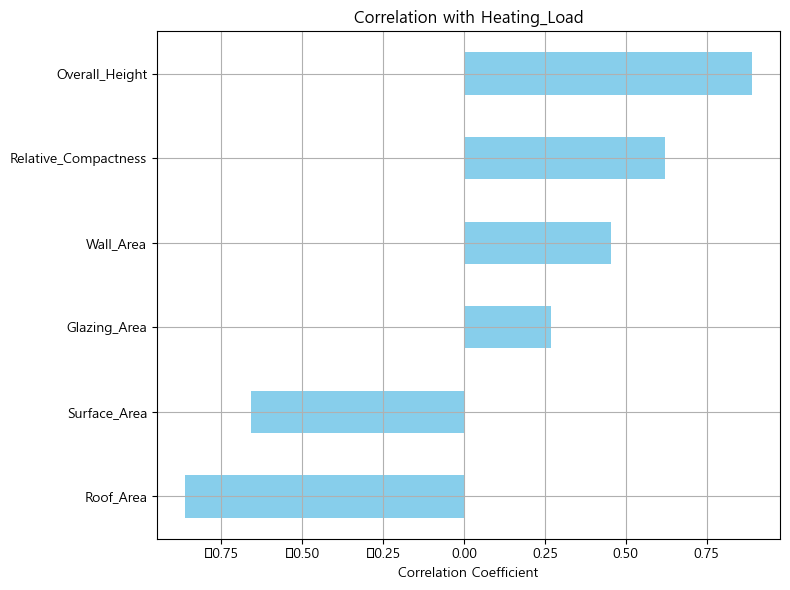

C:\Users\jclle\AppData\Local\Temp\ipykernel_12040\616767646.py:41: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\jclle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


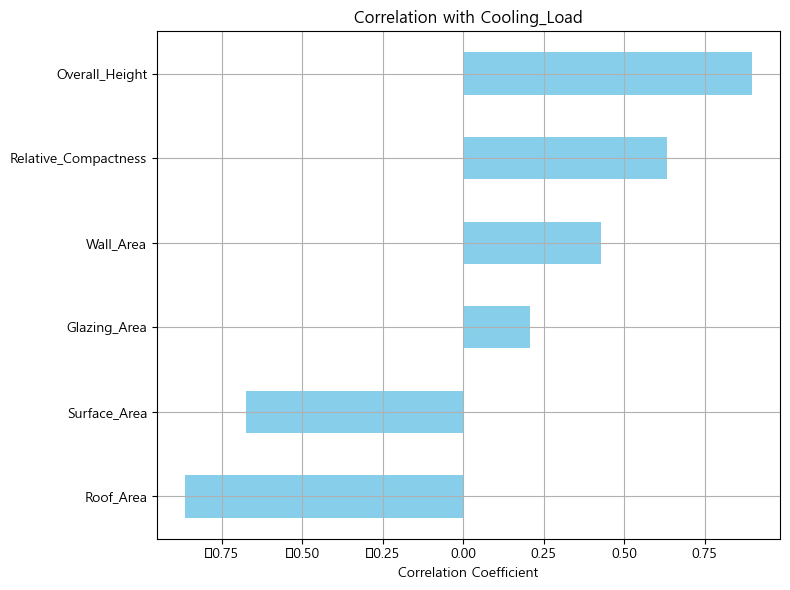

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산 (피어슨 상관계수)
corr_matrix = df.corr()

# 1. 전체 수치형 변수들끼리의 상관관계를 히트맵으로 시각화합니다. 
# -> 피처 간의 강한 상관성 여부를 확인할 수 있습니다.
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_features + ['Heating_Load', 'Cooling_Load']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Numerical Features Correlation Heatmap")
plt.rcParams['font.family'] ='Malgun Gothic'
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. 수치형 변수와 타겟 간 상관관계 막대그래프로 시각화합니다.
# Heating_Load와 관련된 강한 상관성 여부를를 추출합니다. 
target_corr = corr_matrix['Heating_Load'].drop(['Heating_Load', 'Cooling_Load']).sort_values()

plt.figure(figsize=(8, 6))
target_corr.plot(kind='barh', color='skyblue')
plt.title("Correlation with Heating_Load")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.show()

# Cooling_Load 관련된 상관관계를 막대그래프로 시각화합니다.
# -> Cooling_Load에 영향을 주는 주요 피처를 파악합니다.
target_corr = corr_matrix['Cooling_Load'].drop(['Heating_Load', 'Cooling_Load']).sort_values()

plt.figure(figsize=(8, 6))
target_corr.plot(kind='barh', color='skyblue')
plt.title("Correlation with Cooling_Load")
plt.xlabel("Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.show()

## **5) Pipeline 구성 및 corss_val_scroe 활용한 회귀 모델 성능 비교**
---

- 회귀 모델링과 전처리에 필요한 라이브러리를 불러옵니다. 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 다중 타겟용 y를 정의(Heating_Load, Cooling_Load 예측)합니다.
y_multi = df[['Heating_Load', 'Cooling_Load']]

# 1. LinearRegression 모델 파이프라인으로 정의합니다.
# - 스케일링 + 선형 회귀 모델로 편의를 고려했습니다.
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(LinearRegression()))
])

# 2. Ridge 모델 파이프라인으로 정의합니다.
# - 정규화를 포함한 선형 모델입니다 .(alph=1.0)
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MultiOutputRegressor(Ridge(alpha=1.0)))
])

### 교차검증
---

- 교차검증에서 cv=5는 훈련 데이터를 5등분하여 안정적인 성능을 내는지 확인하기 위함입니다. 

In [9]:
# R²를 기준으로로 교차검증을 진행합니다. 
scores_lr_r2 = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='r2')
scores_ridge_r2 = cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='r2')

# MAE 기준으로 (음수로 반환되므로 나중에 절댓값 취함) 진행합니다. 
scores_lr_mae = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
scores_ridge_mae = cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# RMSE 기준으로 (음수로 반환되므로 절댓값 취함) 진행합니다.
scores_lr_rmse = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
scores_ridge_rmse = cross_val_score(ridge_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# 각 평가 지표를 사용하여 결과를 출력합니다.
print("[R² 평균]")
print("  LinearRegression R² 평균:", scores_lr_r2.mean())
print("  Ridge R² 평균:", scores_ridge_r2.mean())

print("\n[MAE 평균 (절댓값)]")
print("  LinearRegression MAE 평균:", abs(scores_lr_mae.mean()))
print("  Ridge MAE 평균:", abs(scores_ridge_mae.mean()))

print("\n[RMSE 평균 (절댓값)]")
print("  LinearRegression RMSE 평균:", abs(scores_lr_rmse.mean()))
print("  Ridge RMSE 평균:", abs(scores_ridge_rmse.mean()))

[R² 평균]
  LinearRegression R² 평균: 0.8989061150608197
  Ridge R² 평균: 0.8987726425411035

[MAE 평균 (절댓값)]
  LinearRegression MAE 평균: 2.162607182652288
  Ridge MAE 평균: 2.1623923878434113

[RMSE 평균 (절댓값)]
  LinearRegression RMSE 평균: 3.0785156799506113
  Ridge RMSE 평균: 3.080985687300267


## **6) 모델 학습**
---
### **LinearRegression 모델**
LinearRegression 모델은 기본적인 회귀 모델이며 학습 속도가 빠르고 수식 기반 해석이 가능합니다. 성능 기준점으로 적합하다고 생각하였고, 해석을 쉽게 하기 위해 선택했습니다. 

### **Ridge 모델**
Ridge 모델은 과적합을 방지하는데 있어 높은 성능을 가지고 있습니다. L2 정규화를 통해 한 가중치에 값을 부여하지 않고 큰 계수를 억제하여 모델의 일반화 성능을 향상시킵니다. 이는 alpha 값을 조절하여 성능을 조정할 수 있습니다. 또한, LinearRegression이 과적합되는 경우를 보완하는 목적도 가지고 있어서 이 모델을 선택하였습니다. 

### **모델 학습**
LinearRegression 모델과 Ridge 모델 학습을 수행합니다.

In [10]:
# LinearRegression 학습 (기본 선형 회귀 모델)
lr_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 MultiOutputRegressor(estimator=LinearRegression()))])

In [11]:
# Ridge 학습 (L2 정규화를 통해 과적합 방지 효과를 포함한 회귀 모델)
ridge_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MultiOutputRegressor(estimator=Ridge()))])

### **성능 평가**

1) 모델 성능을 확인 후 평가하겠습니다.

    - 파이프라인 구현 및 단일 성능 확인
    - Grid, LinearRegression 모델을 전처리와 학습을 한번에 진행하기 위해 파이프라인으로 구현합니다. 
    - 검증셋에서의 단일 성능을 확인합니다.
    - R², MAE, RMSE 기준으로 모델 성능을 비교합니다.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pipeline 방식으로 학습
lr_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)

# 예측도 Pipeline에 원본 데이터 넣기
y_pred_lr = lr_pipe.predict(X_test)
y_pred_ridge = ridge_pipe.predict(X_test)

모델 학습을 수행 후 X_test에 대해서 예측값을 생성하고 실제값 y_test와 비교하여 성능을 R², MAE와 RMSE 평가지표를 활용하여 오차를 설명합니다. 

In [13]:
print(f'LinearRegression 검증 데이터 "R²" 점수: {r2_score(y_test, y_pred_lr):.4f}')
print(f'Ridge 검증 데이터 R² 점수: {r2_score(y_test, y_pred_ridge):.4f}')

LinearRegression 검증 데이터 "R²" 점수: 0.9021
Ridge 검증 데이터 R² 점수: 0.9016


In [14]:
print(f'LinearRegression 검증 데이터 "MAE" 점수: {mean_absolute_error(y_test, y_pred_lr):.4f}')
print(f'Ridge 검증 데이터 "MAE" 점수: {mean_absolute_error(y_test, y_pred_ridge):.4f}')

LinearRegression 검증 데이터 "MAE" 점수: 2.1824
Ridge 검증 데이터 "MAE" 점수: 2.1834


In [15]:
print(f'LinearRegression 검증 데이터 "RMSE" 점수: {mean_squared_error(y_test, y_pred_lr):.4f}')
print(f'Ridge 검증 데이터 "RMSE" 점수: {mean_squared_error(y_test, y_pred_ridge):.4f}')

LinearRegression 검증 데이터 "RMSE" 점수: 9.5860
Ridge 검증 데이터 "RMSE" 점수: 9.6367


## **7) 냉난방 부하 예측**

---
- y_test에 있는 실제값과 y_pred_lr에 있는 예측값을 모델 학습을 통해 예측하고 시각화를 해서 보여줍니다. 
<br/>
<br/>
<br/>
LinearRegression 예측값을 실제값과 비교하여 산점도로 시각화하여 보여줍니다.

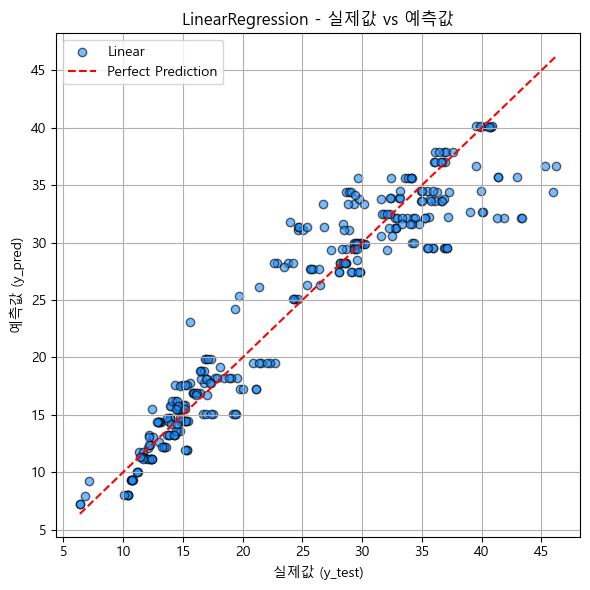

In [16]:
import matplotlib.pyplot as plt

# LinearRegression 시각화합니다. 
# y_test: 실제값, y_pred_lr: 예측값 (LinearRegression 기준)을 산점도로 표현합니다. 
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='dodgerblue', edgecolor='k', label = 'Linear')

# 정답선 (예측이 완벽하면 이 선 위에 있음)
plt.plot([y_test.min().min(), y_test.max().max()],
         [y_test.min().min(), y_test.max().max()],
         'r--', label='Perfect Prediction')

plt.title("LinearRegression - 실제값 vs 예측값")
plt.xlabel("실제값 (y_test)")
plt.ylabel("예측값 (y_pred)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ridge 모델 예측값을 실제값과 비교하여 산점도로 시각화하여 보여줍니다.

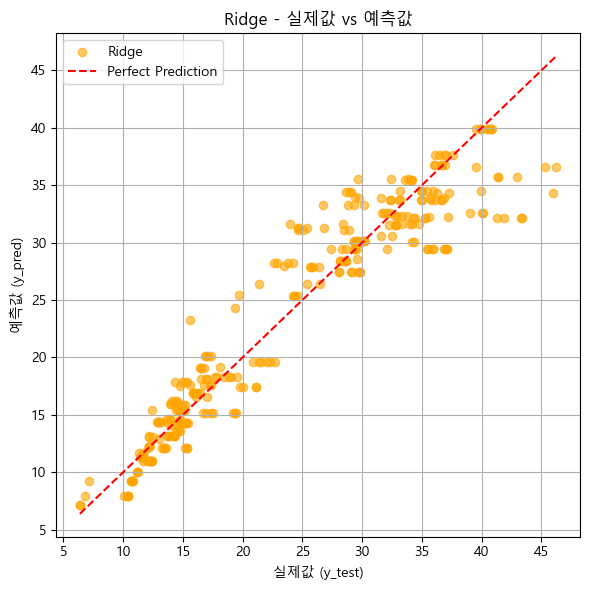

In [17]:
# y_test: 실제값, y_pred_ridge: 예측값 (Ridge 기준)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='orange', label='Ridge')

# 정답선 (예측이 완벽하면 이 선 위에 있음)
plt.plot([y_test.min().min(), y_test.max().max()],
         [y_test.min().min(), y_test.max().max()],
         'r--', label='Perfect Prediction')

plt.title("Ridge - 실제값 vs 예측값")
plt.xlabel("실제값 (y_test)")
plt.ylabel("예측값 (y_pred)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jclle\AppData\Local\Temp\ipykernel_12040\1897474449.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\jclle\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


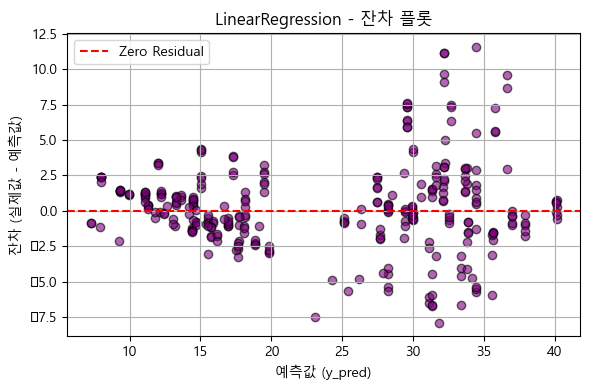

In [18]:
# LinearRegression모델을 활용해서 잔차 플롯 시각화
# 각 샘플의 오차를 점으로 표현했습니다. 빨간 점선은 완벽한 예측을 의미하고 그 기준으로 오차를 비교합니다. 
residuals_lr = y_test - y_pred_lr

# 잔차 플롯
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.6, color='purple', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("LinearRegression - 잔차 플롯")
plt.xlabel("예측값 (y_pred)")
plt.ylabel("잔차 (실제값 - 예측값)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\jclle\AppData\Local\Temp\ipykernel_12040\218138691.py:14: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


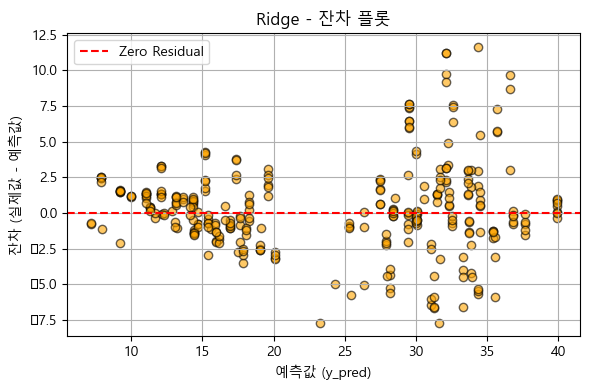

In [19]:
# Ridge 모델을 활용해서 잔차 플롯으로 시각화를 진행합니다.
# 오차가 어느정도로 분포되어있는지 확인할 수 있습니다.
residuals_ridge = y_test - y_pred_ridge

# Ridge 잔차 플롯
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.6, color='orange', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title("Ridge - 잔차 플롯")
plt.xlabel("예측값 (y_pred)")
plt.ylabel("잔차 (실제값 - 예측값)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## **8) 하이퍼파라미터 튜닝**

---

- GridSearchCv를 통해 Grid 모델을 최적의 훈련 모델을 구현하기 위해 튜닝/컨트롤을 해줍니다.<br/>
<br/>
반면 LinearRegression은 데이터만으로 최적의 가중치를 계산하여 튜닝 없이 해를 구하는 모델입니다. 실질적으로 성능에 영향을 주는 파라미터가 없음으로 위 모델은 하이퍼파라미터를 구현하지 않았습니다. 
<br/>
<br/>
<br/>
R² 기준으로 최적 alpha 탐색하여 예측력이 가장 높은 범위를 탐색합니다.

In [20]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 범위 설정
# alpha는 Ridge의 L2 정규화 강도를 조절하는 파라미터입니다. 값을 정규화 시켜 과적합을 방지합니다. 
# 로그 스케일로 실험하는 것이 효과적이라고 생각하여 범위를 10배 단위로 설정하였습니다. 
param_grid = {
    'regressor__estimator__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearchCV 수행 cv=5 교차검증으로 apha 최적값을 탐색합니ㅏ다. 
grid = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 평균 점수 결과를 출력합니다. 
print("최적 하이퍼파라미터:", grid.best_params_)
print("최고 평균 R² 점수:", grid.best_score_)

최적 하이퍼파라미터: {'regressor__estimator__alpha': 0.1}
최고 평균 R² 점수: 0.8989160294581557


MAE 기준으로 최적 alpha 탐색합니다. 

In [21]:
from sklearn.metrics import make_scorer, mean_squared_error

# MAE 기준으로 Ridge 모델을 평가하고 alpha 값을 탐색합니다.
# MAE나 RMSE처럼 작을수록 좋은 지표는 음수로 변환하여 사용합니다. 
# scoring = 'neg_mean_absolute_error' -> 음수로 반환하여 score탐색합니다. 
grid_mae = GridSearchCV(
    ridge_pipe,
    param_grid={'regressor__estimator__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    cv=5,
    scoring='neg_mean_absolute_error'
)
grid_mae.fit(X_train, y_train)

# 결과를 출력하는데 절댓값은 실제 MAE로 보기 위해 abs를 사용하여 오차를 판단합니다. 
print("✅ MAE 기준 최적 하이퍼파라미터:", grid_mae.best_params_)
print("📉 최고 평균 (음수) MAE 점수:", grid_mae.best_score_)
print("📈 최고 평균 MAE 점수 (절댓값):", abs(grid_mae.best_score_)) 

✅ MAE 기준 최적 하이퍼파라미터: {'regressor__estimator__alpha': 0.1}
📉 최고 평균 (음수) MAE 점수: -2.161952677465684
📈 최고 평균 MAE 점수 (절댓값): 2.161952677465684


RMSE 기준으로 최적 alpha 탐색합니다. 

In [22]:
from sklearn.model_selection import GridSearchCV

# RMSE 기준으로 평가 (MAE와 비슷하게 작을수록 좋은 지표이며 음수로 변환하여 사용합니다.)
grid_rmse = GridSearchCV(
    ridge_pipe,
    param_grid={'regressor__estimator__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]},
    cv=5,
    scoring='neg_root_mean_squared_error'
)
grid_rmse.fit(X_train, y_train)

# 결과를 출력하는데 절댓값은 실제 RMSE를 보기 위해 abs를 사용하여 오차를 판단합니다. 
print("✅ RMSE 기준 최적 하이퍼파라미터:", grid_rmse.best_params_)
print("📉 최고 평균 (음수) RMSE 점수:", grid_rmse.best_score_)
print("📈 최고 평균 RMSE 점수 (절댓값):", abs(grid_rmse.best_score_))

✅ RMSE 기준 최적 하이퍼파라미터: {'regressor__estimator__alpha': 0.1}
📉 최고 평균 (음수) RMSE 점수: -3.0784244151044615
📈 최고 평균 RMSE 점수 (절댓값): 3.0784244151044615


### **하이퍼파라미터 튜닝 비교** 
RandomizedSearchCV로 하이퍼파라미터 튜닝을 통해 GridSearchCV와 비교합니다.
<br/>
<br/>
RandomizedSearchCV란 미리 지정한 하이퍼파라미터 범위에서 무작위로 일부 조합만 선택하여 모델 성능을 평가하고, 성능이 좋은 조합을 찾아주는 도구입니다.

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# 탐색할 alpha 값의 범위를 정의해줍니다. 
# 0.01 ~ 100 범위 안에서 무작위로 샘플링을 합니다. 
param_dist = {
    'regressor__estimator__alpha': uniform(loc=0.01, scale=100)  
}

R²를 평가 기준으로 최적의 하이퍼파라미터와 모델이 가장 높은 예측 정확도를 보인 평균 R²을 출력합니다. 

In [24]:
# R² 기준 성능 향상을 위한 RandomizedSearchCV 수행해봅니다.  
random_r2 = RandomizedSearchCV(
    ridge_pipe,
    param_distributions=param_dist,
    n_iter=20, # 총 20개의 alpha 조합을 랜덤으로 시도합니다. 
    cv=5,
    scoring='r2',
    random_state=42
)
random_r2.fit(X_train, y_train)

print("🔹 [R²] 최적 하이퍼파라미터:", random_r2.best_params_)
print("🔹 [R²] 최고 평균 R² 점수:", random_r2.best_score_)


🔹 [R²] 최적 하이퍼파라미터: {'regressor__estimator__alpha': np.float64(2.0684494295802445)}
🔹 [R²] 최고 평균 R² 점수: 0.8984304962413441


MAE를 평가 기준으로 최적의 하이퍼파라미터와 모델이 가장 높은 예측 정확도를 보인 평균 R²을 출력합니다. 

In [25]:
# MAE 기준으로 RandomizedSearchCV 수행해봅니다. 
# GridSearch와 마찬가지로 MAE가 작을수록 좋게 평가가 됩니다. 
random_mae = RandomizedSearchCV(
    ridge_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_mean_absolute_error',
    random_state=42
)
random_mae.fit(X_train, y_train)

print("🔹 [MAE] 최적 하이퍼파라미터:", random_mae.best_params_)
print("🔹 [MAE] 최고 평균 (음수) MAE 점수:", random_mae.best_score_)
print("➡️ 실제 MAE 값:", abs(random_mae.best_score_)) # 실제 오차 해석을 abs를 통해 합니다.

🔹 [MAE] 최적 하이퍼파라미터: {'regressor__estimator__alpha': np.float64(2.0684494295802445)}
🔹 [MAE] 최고 평균 (음수) MAE 점수: -2.1679855956327407
➡️ 실제 MAE 값: 2.1679855956327407


RMSE를 평가 기준으로 최적의 하이퍼파라미터와 모델이 가장 높은 예측 정확도를 보인 평균 R²을 출력합니다. 

In [26]:
# RMSE 기준으로 RandomizedSearchCV 수행합니다. 
random_rmse = RandomizedSearchCV(
    ridge_pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42
)
random_rmse.fit(X_train, y_train)

print("🔹 [RMSE] 최적 하이퍼파라미터:", random_rmse.best_params_)
print("🔹 [RMSE] 최고 평균 (음수) RMSE 점수:", random_rmse.best_score_)
print("➡️ 실제 RMSE 값:", abs(random_rmse.best_score_)) # 실제 오차 해석을 abs를 통해 합니다.

🔹 [RMSE] 최적 하이퍼파라미터: {'regressor__estimator__alpha': np.float64(2.0684494295802445)}
🔹 [RMSE] 최고 평균 (음수) RMSE 점수: -3.086463338482415
➡️ 실제 RMSE 값: 3.086463338482415


In [27]:
# 평균값 전체 출력
print("Heating_Load 평균:", df['Heating_Load'].mean())
print("Cooling_Load 평균:", df['Cooling_Load'].mean())

Heating_Load 평균: 22.307200520833334
Cooling_Load 평균: 24.58776041666667


## 결과
---

- GridSearchCV와 RandomizedSearchCV를 사용해 하이퍼파라미터 튜닝을 수행한 후, 각 방법으로 도출된 최적의 alpha 값을 비교했습니다. <br/>
전체적인 오차 범위는 유사하지만, 소수점 이하 성능 지표까지 비교한 결과, GridSearchCV에서 도출된 alpha 값이 약간 더 나은 성능을 보여 최적값으로 채택하였습니다. 